In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
import matplotlib.font_manager as fm
import matplotlib.colors as mcolors
from matplotlib import cm
from highlight_text import fig_text, ax_text
from matplotlib.colors import LinearSegmentedColormap, NoNorm
from matplotlib import cm
import matplotlib.gridspec as gridspec
import numpy as np
from mplsoccer import FontManager
from PIL import Image
import urllib
import json
import os

In [2]:
font_normal = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/roboto/'
                          'Roboto%5Bwdth,wght%5D.ttf')
font_italic = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/roboto/'
                          'Roboto-Italic%5Bwdth,wght%5D.ttf')
font_bold = FontManager('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
                        'RobotoSlab%5Bwght%5D.ttf')

In [3]:
df = pd.read_csv('D:/stats project/finaldata_csv (for viz)/G-xG.csv', encoding = "utf-8")

In [4]:
df

,Player,Squad,Gls,xG,delta
0,Kevin De Bruyne,Manchester City,15,6.4,8.6
1,Wissam Ben Yedder,Monaco,25,17.2,7.8
2,Martin Terrier,Rennes,21,13.6,7.4
3,Son Heung-min,Tottenham,23,16.2,6.8
4,Giovanni Simeone,Hellas Verona,17,10.7,6.3
5,Patrik Schick,Leverkusen,24,17.8,6.2
6,Enes Ünal,Getafe,16,10.2,5.8
7,Jamie Vardy,Leicester City,15,9.5,5.5
8,Gianluca Scamacca,Sassuolo,16,10.8,5.2
9,Christopher Nkunku,RB Leipzig,20,14.8,5.2


In [5]:
colors = [
    '#ffb9a9',
    '#ffb3a1',
    '#ffac99',
    '#ffa590',
    '#ff9f88',
    '#ff9880',
    '#ff9178',
    '#ff8a70',
    '#ff8368',
    '#ff7c60',
    '#ff7558',
    '#ff6d50',
    '#ff6548',
    '#ff5d40',
    '#ff5438',
    '#ff4a2f',
    '#ff4027',
    '#ff331e',
    '#ff2313',
    '#ff0606'
]
soc_cm = LinearSegmentedColormap.from_list('SOC', colors, N=50)
cm.register_cmap(name='SOC', cmap=soc_cm)


In [6]:
teams = {"Manchester City":"8456",
         "Paris S-G":"9847",
         "Monaco":"9829",
         "Rennes":"9851",
         "Tottenham":"8586",
         "Dortmund":"9789",
         "Getafe":"8305",
         "Leverkusen":"8178",
         "Hellas Verona":"9876",
         "Leicester City":"8197",
         "Sassuolo":"7943",
         "RB Leipzig":"178475",
         "Lazio":"8543",
         "Fiorentina":"8535",
         "Betis":"8603"}

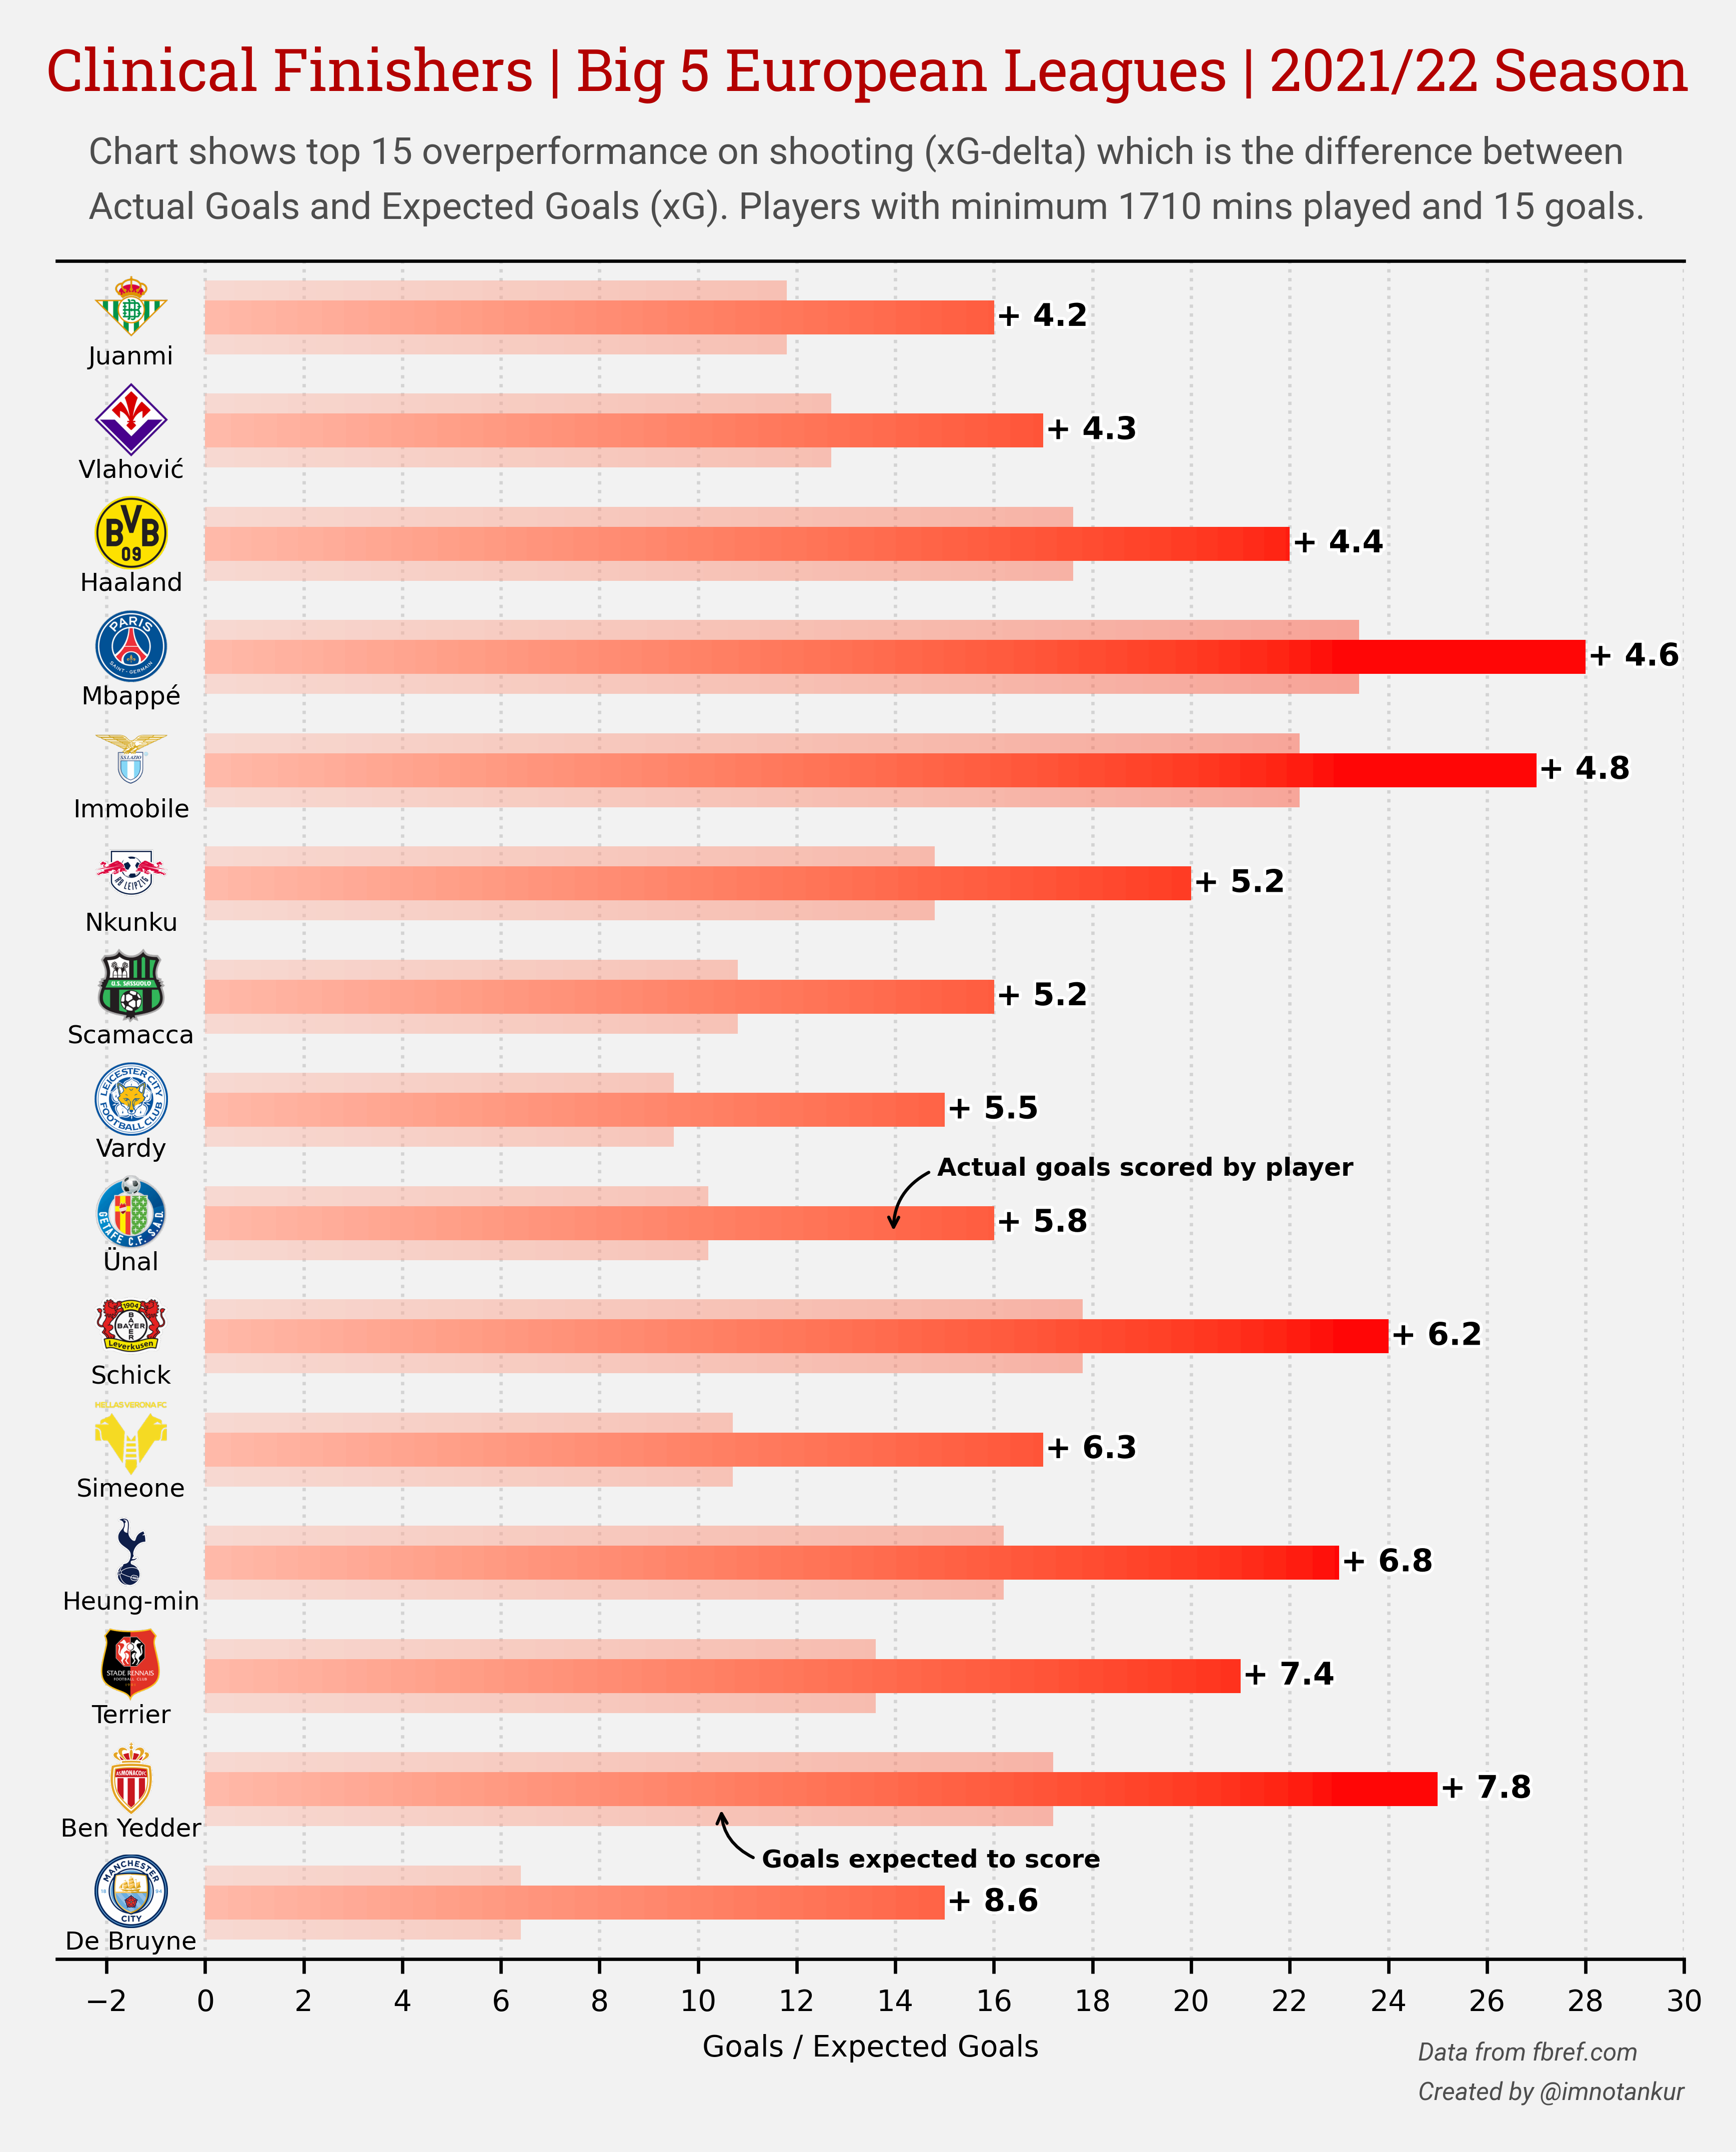

In [7]:
fig = plt.figure(facecolor='#f2f2f2',figsize=(7,7.5), dpi=600)
ax = plt.subplot(111, facecolor='#f2f2f2')

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_yticks([])
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.xaxis.set_label_text('Goals / Expected Goals', size=7)
ax.tick_params(labelsize=7)
ax.grid(axis='x', color='lightgrey', ls=':')
# xG
bars_ = ax.barh(df.index, df['xG'], height=0.65)
for bar in bars_:
    bar.set_zorder(1)
    bar.set_facecolor('none')
    x,y = bar.get_xy()
    w, h = bar.get_width(), bar.get_height()
    grad = np.atleast_2d(np.linspace(0,1*w/max(df['Gls']),256))
    ax.imshow(
        grad, extent=[x,x+w,y,y+h], 
        aspect='auto', zorder=3, 
        norm=NoNorm(vmin=0,vmax=1), cmap='SOC', alpha=0.45
    )
# xGOT
bars_ = ax.barh(df.index, df['Gls'], height=0.3)
lim = ax.get_xlim()+ax.get_ylim()
for bar in bars_:
    bar.set_zorder(1)
    bar.set_facecolor('none')
    x,y = bar.get_xy()
    w, h = bar.get_width(), bar.get_height()
    grad = np.atleast_2d(np.linspace(0,1*w/max(df['xG']),256))
    ax.imshow(
        grad, extent=[x,x+w,y,y+h], 
        aspect='auto', zorder=3, 
        norm=NoNorm(vmin=0,vmax=1), cmap='SOC'
    )

ax.set_xlim(-3,30)
ax.set_ylim(-0.5,14.5)
DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# -- Take data coordinates and transform them to normalized figure coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
for y in df.index:
    ax_coords = DC_to_NFC((-2.24,y-.25))
    if (df['Player'].iloc[y] == "Kevin De Bruyne") | (df['Player'].iloc[y] == "Wissam Ben Yedder"):
        player = df['Player'].iloc[y].split(' ')[1]+' '+df['Player'].iloc[y].split(' ')[2]
    elif df['Player'].iloc[y] == "Juanmi":
        player = df['Player'].iloc[y]
    else:
        player = df['Player'].iloc[y].split(' ')[1]
    team_name = df['Squad'].iloc[y].replace(' ', '\n')
    diff_xg = df['delta'].iloc[y]
    xG = df['xG'].iloc[y]
    G = df['Gls'].iloc[y]
    text_sign = '+'
    ax_size = 0.035
    image_ax = fig.add_axes(
        [ax_coords[0], ax_coords[1], ax_size, ax_size],
        fc='None', anchor='C'
    )
    fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
    player_face = Image.open(urllib.request.urlopen(f"{fotmob_url}{teams[df['Squad'].iloc[y]]}.png"))
    image_ax.imshow(player_face)
    image_ax.axis("off")
    ax.annotate(
        xy=(-1.50, y - .35),
        text=player,
        size=6,
        ha='center',
        va='center'
    )
    text_ = ax.annotate(
        xy=(G+0.3, y),
        xytext=(8,0),
        text=f'{text_sign} {diff_xg}',
        size=7.5,
        ha='center',
        va='center',
        textcoords='offset points',
        weight='bold'
    )
    text_.set_path_effects(
        [path_effects.Stroke(linewidth=1.5, foreground='white'), path_effects.Normal()]
    )


text_ = ax.annotate(
    xy=(14, 5.75),
    xytext=(60,20),
    text='Actual goals scored by player',
    size=6,
    ha='center',
    va='center',
    textcoords='offset points',
    weight='bold',
    arrowprops=dict(
            arrowstyle="->", shrinkA=0, shrinkB=5, color="black", linewidth=0.75,
            connectionstyle="angle3,angleA=-10,angleB=100"
    )
)

text_ = ax.annotate(
    xy=(10.5, 1.0),
    xytext=(50,-17),
    text='Goals expected to score',
    size=6,
    ha='center',
    va='center',
    textcoords='offset points',
    weight='bold',
    arrowprops=dict(
            arrowstyle="->", shrinkA=0, shrinkB=5, color="black", linewidth=0.75,
            connectionstyle="angle3,angleA=10,angleB=-100"
    )
)

fig_text(
    x = 0.12, y = .95, 
    s = "Clinical Finishers | Big 5 European Leagues | 2021/22 Season",
    va = "bottom", ha = "left",
    fontsize = 14, color = "#b30000", fontproperties = font_bold.prop
)
fig_text(
	x = 0.14, y = .895, 
    s = "Chart shows top 15 overperformance on shooting (xG-delta) which is the difference between\nActual Goals and Expected Goals (xG). Players with minimum 1710 mins played and 15 goals.",
	va = "bottom", ha = "left",
	fontsize = 9, color = "#4d4d4d", fontproperties = font_normal.prop
)
fig_text(
    x = 0.90, y = 0.06,
    s = 'Data from fbref.com\nCreated by @imnotankur',
    va = "bottom", ha = 'right',
    fontsize = 6, color = "#4d4d4d", fontproperties = font_italic.prop
)
plt.savefig(
	"D:/stats project/visualizations/striker_barchart.png",
	dpi = 600,
	bbox_inches="tight",
    edgecolor="none",
	transparent = False)